# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [257]:
df = pd.read_csv("C:/Users/s-edw/Downloads/states_edu.csv")

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [258]:
# We will drop rows where Total_REVENUE or Total_Expenditure is NA, because we want to set profit as our outcome with minimal bias
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)

# We drop these columns, because they are either part of TOTAL_REVENUE OR TOTAL_EXPENDITURE
df.drop(columns = ['FEDERAL_REVENUE','STATE_REVENUE', 'LOCAL_REVENUE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',"ENROLL" ],axis =1, inplace = True)

#We create a new column called Total_PROFIT, which is our outcome
df["Total_PROFIT"] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

for index, row in df.iterrows():
    
    if pd.isna(row["GRADES_PK_G"]):
        
        df.loc[index,"GRADES_PK_G"] = row["GRADES_ALL_G"]/14
        
    if pd.isna(row["GRADES_KG_G"]):
        df.loc[index,"GRADES_KG_G"]=row["GRADES_ALL_G"]/14 
    
    if pd.isna(row["GRADES_4_G"]):
        if row["GRADES_1_8_G"].notna():
            df.loc[index,"GRADES_4_G"] = row["GRADES_1_8_G"]/8
        else:
            df.loc[index,"GRADES_4_G"] = row["GRADES_ALL_G"]/14
    if pd.isna(row["GRADES_8_G"]):
        if row["GRADES_1_8_G"].notna():
            df.loc[index,"GRADES_8_G"] = row["GRADES_1_8_G"]/8
            
        else:
            df.loc[index,"GRADES_8_G"] = row["GRADES_ALL_G"]/14
    
    if pd.isna(row["GRADES_12_G"]):
        if row["GRADES_9_12_G"].notna():
            df.loc[index,"GRADES_12_G"] = row["GRADES_9_12_G"]/4
            
        else:
            df.loc[index,"GRADES_12_G"] = row["GRADES_ALL_G"]/14
    
    if pd.isna(row["AVG_MATH_4_SCORE"]):
        
        df.loc[index,"AVG_MATH_4_SCORE"] = df[df["STATE"]==row["STATE"]]["AVG_MATH_4_SCORE"].mean()
        
    
    if pd.isna(row["AVG_MATH_8_SCORE"]):
        df.loc[index,"AVG_MATH_8_SCORE"] = df[df["STATE"]==row["STATE"]]["AVG_MATH_8_SCORE"].mean()
    
    if pd.isna(row["AVG_READING_4_SCORE"]):
    
        df.loc[index,"AVG_READING_4_SCORE"] = df[df["STATE"]==row["STATE"]]["AVG_READING_4_SCORE"].mean()
        

            
    if pd.isna(row["AVG_READING_8_SCORE"]):
        df.loc[index,"AVG_READING_8_SCORE"] = df[df["STATE"]==row["STATE"]]["AVG_READING_8_SCORE"].mean()
        
df['GRADES_1_8_G'] = df['GRADES_1_8_G'].replace(np.nan, (row["GRADES_4_G"]+row["GRADES_8_G"])*4)
df['GRADES_9_12_G'] = df['GRADES_9_12_G'].replace(np.nan, row["GRADES_12_G"]*4)
    
        




<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Profit

How many years of data are logged in our dataset? 

In [259]:
min_years = 100000000000000
max_years=0

for index, row in df.iterrows():
    year = row["PRIMARY_KEY"][0:4]
    if int(year) < min_years:
        min_years = int(year)
        
    if int(year) > max_years:
        max_years = int(year)
    

year = max_years - min_years
print(year)

24


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [260]:
michigan_outcome = df[df["STATE"]=="MICHIGAN"]["Total_PROFIT"].sum() / len(df[df["STATE"]=="MICHIGAN"])

ohio_outcome = df[df["STATE"]=="OHIO"]["Total_PROFIT"].sum() / len(df[df["STATE"]=="OHIO"])

print("Michigan's avg enrollment numbers")
print(michigan_outcome)
print()
print("Ohio's avg enrollment numbers")
print(ohio_outcome)

Michigan's avg enrollment numbers
-149154.64

Ohio's avg enrollment numbers
365198.12


Find the average for your outcome score across all states in 2019

In [261]:
for state in df["STATE"].unique():
    print(state)
    print(df[df["STATE"]== state]["Total_PROFIT"].sum() / len(df[df["STATE"]==state]))
    print()

ALABAMA
-144423.96

ALASKA
-97626.76

ARIZONA
27733.0

ARKANSAS
-96322.0

CALIFORNIA
-448652.04

COLORADO
-204656.44

CONNECTICUT
284520.84

DELAWARE
-17906.56

DISTRICT_OF_COLUMBIA
3622.44

FLORIDA
-422473.88

GEORGIA
104228.12

HAWAII
229850.56

IDAHO
24166.36

ILLINOIS
-171072.36

INDIANA
418123.76

IOWA
-58319.8

KANSAS
43499.52

KENTUCKY
-68428.16

LOUISIANA
67833.6

MAINE
18353.64

MARYLAND
133253.76

MASSACHUSETTS
92846.0

MICHIGAN
-149154.64

MINNESOTA
-336661.84

MISSISSIPPI
-9637.28

MISSOURI
-85076.52

MONTANA
3432.52

NEBRASKA
28591.6

NEVADA
-131121.72

NEW_HAMPSHIRE
-5787.24

NEW_JERSEY
78143.36

NEW_MEXICO
-20609.0

NEW_YORK
-1815537.92

NORTH_CAROLINA
-20305.52

NORTH_DAKOTA
-18113.56

OHIO
365198.12

OKLAHOMA
17800.88

OREGON
-151106.08

PENNSYLVANIA
-416139.04

RHODE_ISLAND
40659.4

SOUTH_CAROLINA
-178371.52

SOUTH_DAKOTA
-10769.88

TENNESSEE
-280123.28

TEXAS
-1467634.28

UTAH
-39493.16

VERMONT
10009.04

VIRGINIA
-219078.16

WASHINGTON
-185945.72

WEST_VIRGINIA
-601

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [262]:
for state in df["STATE"].unique():
    max_profit = 0
    print(state)
    for index, row in df[df["STATE"]== state].iterrows():
        if row["Total_PROFIT"] > max_profit:
            max_profit = row["Total_PROFIT"]
            
    print(max_profit)
    print()

ALABAMA
25087.0

ALASKA
77103.0

ARIZONA
563743.0

ARKANSAS
161455.0

CALIFORNIA
3897129.0

COLORADO
244747.0

CONNECTICUT
593242.0

DELAWARE
58075.0

DISTRICT_OF_COLUMBIA
141464.0

FLORIDA
936214.0

GEORGIA
842562.0

HAWAII
785989.0

IDAHO
165510.0

ILLINOIS
981726.0

INDIANA
2520706.0

IOWA
41176.0

KANSAS
395673.0

KENTUCKY
185545.0

LOUISIANA
748486.0

MAINE
143409.0

MARYLAND
608819.0

MASSACHUSETTS
656621.0

MICHIGAN
1414616.0

MINNESOTA
299888.0

MISSISSIPPI
213545.0

MISSOURI
191821.0

MONTANA
53167.0

NEBRASKA
239811.0

NEVADA
162334.0

NEW_HAMPSHIRE
97783.0

NEW_JERSEY
1141876.0

NEW_MEXICO
119109.0

NEW_YORK
0

NORTH_CAROLINA
2458771.0

NORTH_DAKOTA
40788.0

OHIO
1816932.0

OKLAHOMA
230096.0

OREGON
167728.0

PENNSYLVANIA
447439.0

RHODE_ISLAND
112881.0

SOUTH_CAROLINA
102973.0

SOUTH_DAKOTA
40002.0

TENNESSEE
0

TEXAS
1692334.0

UTAH
167122.0

VERMONT
43518.0

VIRGINIA
17364.0

WASHINGTON
233897.0

WEST_VIRGINIA
433970.0

WISCONSIN
415590.0

WYOMING
98557.0



<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [263]:
#df["Total_Profit"] = df['Total_REVENUE']- df['TOTAL_EXPENDITURE']
#df.drop(columns = ['FEDERAL_REVENUE','STATE_REVENUE', 'LOCAL_REVENUE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE' ],axis =1, inplace = True)



## I modified them already in data cleanup


#Hot-encoding state
one_hot = pd.get_dummies(df['STATE'])
df = df.drop('STATE',axis = 1)
# Join the encoded df
df = df.join(one_hot)


Feature engineering justification: **<I added in the total_profit, because it was my outcome, and I can find it from using TOTAL_REVENUE and TOTAL_EXPENDITURE. Additionally, I dropped several columns, because revenue and expenditure were part of the total_profit column.


Lastly, we hot encoded STATE, because we want numerical predictors, so we can use the linear regression to predict total_profit\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Correlation Matrix**

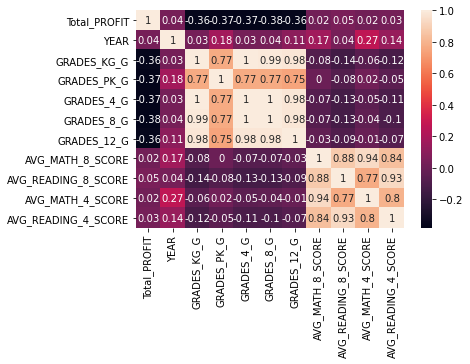

In [264]:
matrix = df[["Total_PROFIT","YEAR","GRADES_KG_G","GRADES_PK_G", "GRADES_4_G","GRADES_8_G","GRADES_12_G","AVG_MATH_8_SCORE","AVG_READING_8_SCORE","AVG_MATH_4_SCORE","AVG_READING_4_SCORE"]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

**<By using the correlation matrix, we can see that the year and test scores have little to no association with total_profit. We will decide to focus on states and enrollment as predictors.>**

**Visualization 2**

<AxesSubplot:title={'center':'Pre_k enrollment vs. Total_Profit'}, xlabel='GRADES_PK_G', ylabel='Total_PROFIT'>

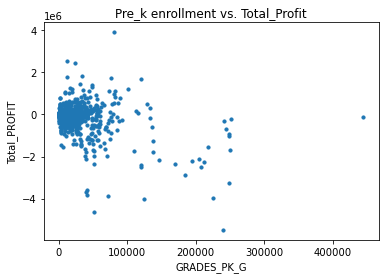

In [265]:
df.plot.scatter(x = 'GRADES_PK_G', y = 'Total_PROFIT', s = 10,title = "Pre_k enrollment vs. Total_Profit")

**<We can see that for lower numbers of pre-k enrollment, there seems to be no association, but as the number of pre-k enrollment increases, the total profit will seemgly decrease too>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X = df[df.drop(columns=["PRIMARY_KEY","Total_PROFIT","TOTAL_REVENUE","TOTAL_EXPENDITURE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE","AVG_MATH_4_SCORE","AVG_READING_4_SCORE","YEAR"],axis = 1).columns] 
y = df["Total_PROFIT"]

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [269]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [270]:
# create your model here
model =  LinearRegression() 

In [271]:
model.fit(X_train, y_train)

LinearRegression()

In [272]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [273]:
correct = 0
i =0
for index, val in y_test.iteritems():
    diff = abs(val -y_pred[i])
    i+=1
    
    if diff <10000:
        correct +=1
        
accuracy = correct / len(y_pred)
print(accuracy*100)

7.8125


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

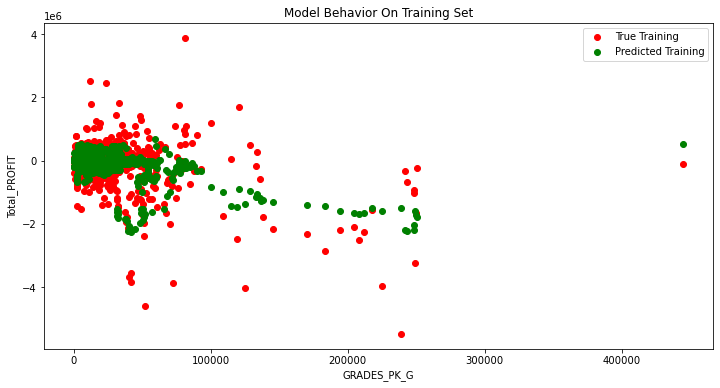

In [274]:
col_name = 'GRADES_PK_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total_PROFIT')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

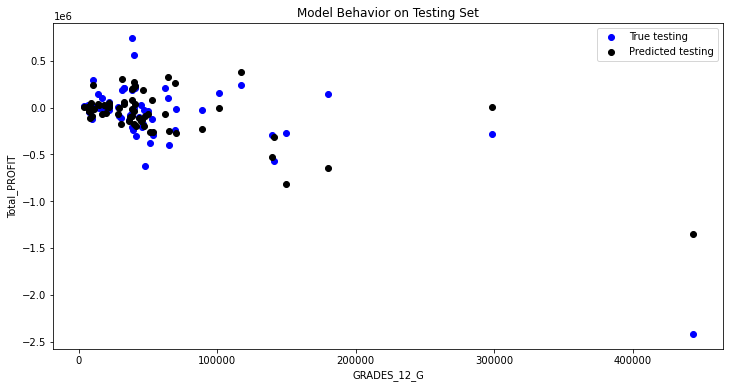

In [275]:
col_name = "GRADES_12_G"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total_PROFIT')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In this dataset, we decided to set the total profit as our outcome, which we found by getting the difference of total revnue and total expenditure. We then take a look at the dataset and try to clean it up of NA values by using the means of related columns. We also dropped revnue and expenditure from our predictors, because they can be used to get the total profit directly.
We created several columns in the dataset by hot encoding the states column, because we want to use the linear regression and states is a categorical variable.

We found that total profit has moderate and negative correlations with enrollment variables, so we decided to focus on states and enrollment variables as our predictor. By fitting the linear regression, we only sadly able to get roughly 7 percent of tests cases correctly.

For the future, we will explore more on finding and fitting the best predictors and also explore more machine learning algorithms for our dataset.
